In [1]:
# import libraries
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import random
import imutils

In [2]:
def addSaltPepperNoise(image, amount):
    output = np.zeros(image.shape,np.uint8)
    threshold = 1 - amount 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < amount:
                output[i][j] = 0
            elif rdn > threshold:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

[[142   0   0 ...  96  92  91]
 [141 142 142 ...   0 255   0]
 [140 140   0 ...  88  85  90]
 ...
 [113 123   0 ...  22  25  25]
 [113 123   0 ...  23 255  24]
 [106 255   0 ...  20  22  23]]


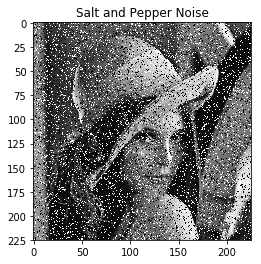

In [7]:
image = cv2.imread('lena.jpg',0)
noise_img = addSaltPepperNoise(image,0.1)
print(noise_img)
noise_img = noise_img.astype('uint8')

cv2.imwrite('saltpepper_noise.jpg', noise_img)

noise_img = cv2.cvtColor(noise_img, cv2.COLOR_GRAY2BGR)

plt.imshow(noise_img)
plt.title('Salt and Pepper Noise')
plt.show()

In [8]:
def addGaussianNoise(image):
    imShape = image.shape
    noise = np.random.normal(255./2,255./10,imShape)
    GaussianImage = image + noise
    GaussianImageNoise = Image.fromarray(GaussianImage)
    output = GaussianImageNoise.convert("RGB")
    
    return output

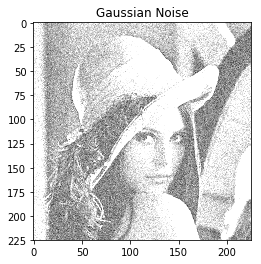

In [9]:
image = Image.open('lena.jpg').convert("L")
LenaImagenpArray = np.array(image)
noise_img = addGaussianNoise(LenaImagenpArray)
noise_img.save('gaussian_noise.jpg')

plt.imshow(noise_img)
plt.title('Gaussian Noise')
plt.show()

In [10]:
def addRayleighNoise(image):
    imShape = image.shape
    noise = np.random.rayleigh(255./10,imShape)
    RayleighImage = image + noise
    RayleighImageNoise = Image.fromarray(RayleighImage)
    output = RayleighImageNoise.convert("RGB")
    
    return output

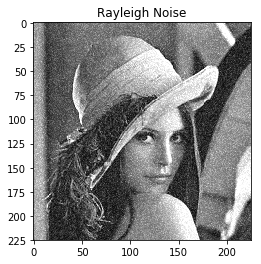

In [11]:
image = Image.open('lena.jpg').convert("L")
LenaImagenpArray = np.array(image)
noise_img = addRayleighNoise(LenaImagenpArray)
noise_img.save("rayleigh_noise_image.jpg")

plt.imshow(noise_img)
plt.title('Rayleigh Noise')
plt.show()

In [12]:
img1 = cv2.imread('gaussian_noise.jpg')
img2 = cv2.imread('saltpepper_noise.jpg')
img3 = cv2.imread('rayleigh_noise_image.jpg')

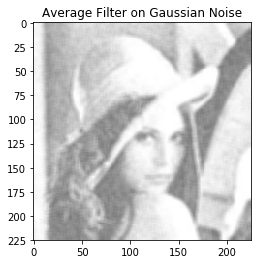

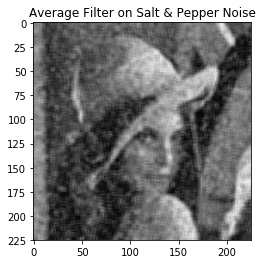

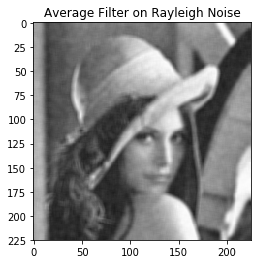

In [13]:
#Average Filter
gaussian_average = cv2.blur(img1,(5,5))
gaussian_average = cv2.cvtColor(gaussian_average, cv2.COLOR_BGR2RGB)
plt.imshow(gaussian_average)
plt.title('Average Filter on Gaussian Noise')
plt.show()

saltpepper_average = cv2.blur(img2,(5,5))
saltpepper_average = cv2.cvtColor(saltpepper_average, cv2.COLOR_BGR2RGB)
plt.imshow(saltpepper_average)
plt.title('Average Filter on Salt & Pepper Noise')
plt.show()

rayleigh_average = cv2.blur(img3,(5,5))
rayleigh_average = cv2.cvtColor(rayleigh_average, cv2.COLOR_BGR2RGB)
plt.imshow(rayleigh_average)
plt.title('Average Filter on Rayleigh Noise')
plt.show()

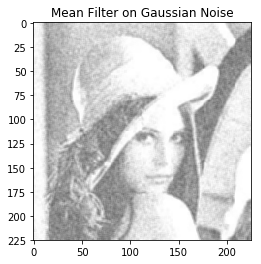

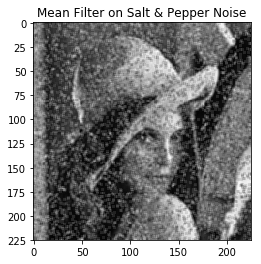

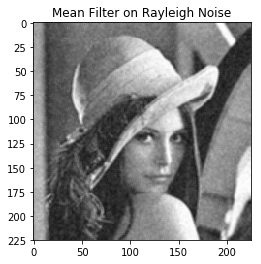

In [14]:
#Mean Filter
kernel = np.ones((3,3),np.float32)/9
gaussian_mean = cv2.filter2D(img1,-1,kernel)
gaussian_mean = cv2.cvtColor(gaussian_mean, cv2.COLOR_BGR2RGB)
plt.imshow(gaussian_mean)
plt.title('Mean Filter on Gaussian Noise')
plt.show()

saltpepper_mean = cv2.filter2D(img2,-1,kernel)
saltpepper_mean = cv2.cvtColor(saltpepper_mean, cv2.COLOR_BGR2RGB)
plt.imshow(saltpepper_mean)
plt.title('Mean Filter on Salt & Pepper Noise')
plt.show()

rayleigh_mean = cv2.filter2D(img3,-1,kernel)
rayleigh_mean = cv2.cvtColor(rayleigh_mean, cv2.COLOR_BGR2RGB)
plt.imshow(rayleigh_mean)
plt.title('Mean Filter on Rayleigh Noise')
plt.show()

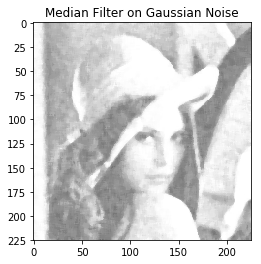

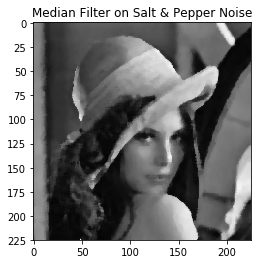

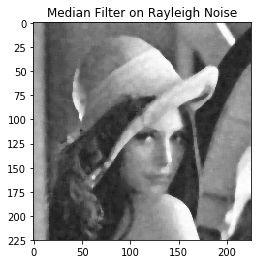

In [15]:
#Median Filter
gaussian_median = cv2.medianBlur(img1,5)
gaussian_median = cv2.cvtColor(gaussian_median, cv2.COLOR_BGR2RGB)
plt.imshow(gaussian_median)
plt.title('Median Filter on Gaussian Noise')
plt.show()

saltpepper_median = cv2.medianBlur(img2,5)
saltpepper_median = cv2.cvtColor(saltpepper_median, cv2.COLOR_BGR2RGB)
plt.imshow(saltpepper_median)
plt.title('Median Filter on Salt & Pepper Noise')
plt.show()

rayleigh_median = cv2.medianBlur(img3,5)
rayleigh_median = cv2.cvtColor(rayleigh_median, cv2.COLOR_BGR2RGB)
plt.imshow(rayleigh_median)
plt.title('Median Filter on Rayleigh Noise')
plt.show()

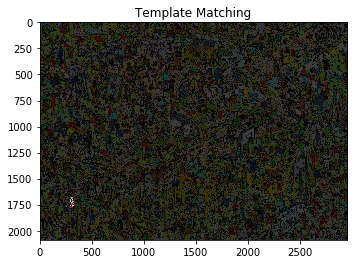

In [16]:
image = cv2.imread('image.png')
template = cv2.imread('template.png')
(templateHeight, templateWidth) = template.shape[:2]

matchResult = cv2.matchTemplate(image, template, cv2.TM_CCOEFF)
(_, _, minLoc, maxLoc) = cv2.minMaxLoc(matchResult)

topLeft = maxLoc
botRight = (topLeft[0] + templateWidth, topLeft[1] + templateHeight)
roi = image[topLeft[1]:botRight[1], topLeft[0]:botRight[0]]
 
mask = np.zeros(image.shape, dtype = "uint8")
image = cv2.addWeighted(image, 0.25, mask, 0.75, 0)

image[topLeft[1]:botRight[1], topLeft[0]:botRight[0]] = roi
 
cv2.imwrite("matchedTemplate.png", image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Template Matching')
plt.show()